### Regression exercises

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from env import get_db_url
from wrangle import show_codeup_dbs


import warnings
warnings.filterwarnings('ignore')

In [7]:
show_codeup_dbs()

List of Codeup DBs:



,Database
0,albums_db
1,chipotle
2,curriculum_logs
3,elo_db
4,employees
5,fruits_db
6,grocery_db
7,home_credit
8,information_schema
9,innis_1673


In [8]:
url = get_db_url('zillow')

pd.read_sql('SHOW TABLES', url)

,Tables_in_zillow
0,airconditioningtype
1,architecturalstyletype
2,buildingclasstype
3,heatingorsystemtype
4,predictions_2016
5,predictions_2017
6,properties_2016
7,properties_2017
8,propertylandusetype
9,storytype


In [9]:
pd.read_sql('DESCRIBE properties_2017', url)

,Field,Type,Null,Key,Default,Extra
0,id,bigint,YES,MUL,None,
1,parcelid,bigint,YES,MUL,None,
2,airconditioningtypeid,double,YES,,None,
3,architecturalstyletypeid,double,YES,,None,
4,basementsqft,double,YES,,None,
5,bathroomcnt,double,YES,,None,
6,bedroomcnt,double,YES,,None,
7,buildingclasstypeid,double,YES,,None,
8,buildingqualitytypeid,double,YES,,None,
9,calculatedbathnbr,double,YES,,None,


In [10]:
def get_prop_vals():
    filename = 'prop_vals.csv'
    if os.path.exists(filename):
        print('Reading from CSV file...')
        return pd.read_csv(filename)
    query = ''' SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, propertylandusetypeid
    FROM properties_2017
    '''
    print('Getting a fresh copy from SQL database...')
    prop_vals = pd.read_sql(query, url)
    print('Copying to CSV...')
    prop_vals.to_csv(filename, index=False)
    return prop_vals



In [11]:
prop_vals = get_prop_vals()
prop_vals.info()
prop_vals.head()

Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
dtypes: float64(8)
memory usage: 182.2 MB


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0,269.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0,47.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0,47.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0,31.0


In [12]:
(prop_vals.isna().sum() / len(prop_vals))

bedroomcnt                      0.000987
bathroomcnt                     0.000991
calculatedfinishedsquarefeet    0.015107
taxvaluedollarcnt               0.011479
yearbuilt                       0.016023
taxamount                       0.007622
fips                            0.000982
propertylandusetypeid           0.000982
dtype: float64

In [8]:
pd.read_sql('DESCRIBE propertylandusetype', url)

,Field,Type,Null,Key,Default,Extra
0,propertylandusetypeid,bigint,NO,PRI,None,
1,propertylandusedesc,text,YES,,None,


In [12]:
prop_types = pd.read_sql('SELECT * FROM propertylandusetype', url)
prop_types.to_csv('prop_types.csv')

In [13]:
prop_types.shape
prop_types

,propertylandusetypeid,propertylandusedesc
0,31,Commercial/Office/Residential Mixed Used
1,46,Multi-Story Store
2,47,Store/Office (Mixed Use)
3,246,"Duplex (2 Units, Any Combination)"
4,247,"Triplex (3 Units, Any Combination)"
5,248,"Quadruplex (4 Units, Any Combination)"
6,260,Residential General
7,261,Single Family Residential
8,262,Rural Residence
9,263,Mobile Home


In [14]:
prop_vals.columns

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusetypeid'],
      dtype='object')

In [28]:
# shorten column names
prop_vals = prop_vals.rename(columns={
    'bedroomcnt': 'bedrooms', 
    'bathroomcnt': 'bathrooms', 
    'calculatedfinishedsquarefeet': 'calcfin_sqft', 
    'taxvaluedollarcnt': 'tax_val',
    'yearbuilt': 'yr_built',
    'taxamount': 'tax_amt',
    'fips': 'fips',
    'propertylandusetypeid': 'prop_use_id'
    })

prop_vals.info()
prop_vals.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      float64
 1   bathrooms     float64
 2   calcfin_sqft  float64
 3   tax_val       float64
 4   yr_built      float64
 5   tax_amt       float64
 6   fips          float64
 7   prop_use_id   float64
dtypes: float64(8)
memory usage: 182.2 MB


,bedrooms,bathrooms,calcfin_sqft,tax_val,yr_built,tax_amt,fips,prop_use_id
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0,269.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0,47.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0,47.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0,31.0


In [34]:
# output null ratios for future reference
print(f'DataFrame null ratios:\n{(prop_vals.isna().sum() / len(prop_vals))}') 

DataFrame null ratios:
bedrooms        0.000987
bathrooms       0.000991
calcfin_sqft    0.015107
tax_val         0.011479
yr_built        0.016023
tax_amt         0.007622
fips            0.000982
prop_use_id     0.000982
dtype: float64


In [35]:
single_fams = prop_vals[prop_vals.prop_use_id == 261]
single_fams.info()
single_fams.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 1 to 2982282
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      float64
 1   bathrooms     float64
 2   calcfin_sqft  float64
 3   tax_val       float64
 4   yr_built      float64
 5   tax_amt       float64
 6   fips          float64
 7   prop_use_id   float64
dtypes: float64(8)
memory usage: 147.8 MB


,bedrooms,bathrooms,calcfin_sqft,tax_val,yr_built,tax_amt,fips,prop_use_id
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
15,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
16,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
17,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [5]:
# output fips value counts (for whatever 'fips' is...)
print(f'FIPS value counts:\n{single_fams.fips.value_counts()}')
print('-------------')
# output null ratios for single_fams subset
print(f'Single family residential subset null ratios:\n{single_fams.isna().sum()}')

NameError: name 'single_fams' is not defined

In [42]:
# null ratios well under 1%, so drop them
single_fams = single_fams.dropna()
single_fams.info()
single_fams.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 20 to 2982282
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      float64
 1   bathrooms     float64
 2   calcfin_sqft  float64
 3   tax_val       float64
 4   yr_built      float64
 5   tax_amt       float64
 6   fips          float64
 7   prop_use_id   float64
dtypes: float64(8)
memory usage: 147.0 MB


,bedrooms,bathrooms,calcfin_sqft,tax_val,yr_built,tax_amt,fips,prop_use_id
20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0
31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,261.0
33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,261.0
62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,261.0
97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,261.0


In [46]:
# bedrooms, bathrooms, calcfin_sqft, yr_built, and fips columns don't need to floats, so cast as ints
single_fams[['bedrooms', 'bathrooms', 'calcfin_sqft', 'yr_built', 'fips']] = single_fams[['bedrooms', 'bathrooms', 'calcfin_sqft', 'yr_built', 'fips']].astype('int')
# prop_use_id no longer needed, so drop it
single_fams = single_fams.drop(columns= ['prop_use_id'])
single_fams.info()
single_fams.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 20 to 2982282
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      int64  
 1   bathrooms     int64  
 2   calcfin_sqft  int64  
 3   tax_val       float64
 4   yr_built      int64  
 5   tax_amt       float64
 6   fips          int64  
dtypes: float64(2), int64(5)
memory usage: 130.6 MB


,bedrooms,bathrooms,calcfin_sqft,tax_val,yr_built,tax_amt,fips
20,4,2,3633,296425.0,2005,6941.39,6037
31,3,4,1620,847770.0,2011,10244.94,6037
33,3,2,2077,646760.0,1926,7924.68,6037
62,0,0,1200,5328.0,1972,91.60,6037
97,0,0,171,6920.0,1973,255.17,6037


In [49]:
# see if tax_val column really needs to be a float
print(single_fams.tax_val.astype('int'))
# it appears that tax_val doesn't need to be a float, either, so cast as int
single_fams.tax_val = single_fams.tax_val.astype('int')
single_fams.info()

20         296425
31         847770
33         646760
62           5328
97           6920
            ...  
2982265    422400
2982268    960756
2982270    536061
2982275    424353
2982282    554009
Name: tax_val, Length: 2140235, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 20 to 2982282
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      int64  
 1   bathrooms     int64  
 2   calcfin_sqft  int64  
 3   tax_val       int64  
 4   yr_built      int64  
 5   tax_amt       float64
 6   fips          int64  
dtypes: float64(1), int64(6)
memory usage: 130.6 MB


In [52]:
# get a count of "Inferred Single Family Residence" type id
print(f'count of Inferred Single Family Residence type in table: {(prop_vals.prop_use_id == 279).sum()}')
print('Ignoring "Inferred Single Family Residence".')

count of Inferred Single Family Residence type in table: 1
Ignoring "Inferred Single Family Residence".


In [54]:
# confirm that null values cleared out of the subset we want
print(f'Remaining nulls is target subset:\n{single_fams.isna().sum()}')
print('The data is clean')

Remaining nulls is target subset:
bedrooms        0
bathrooms       0
calcfin_sqft    0
tax_val         0
yr_built        0
tax_amt         0
fips            0
dtype: int64


In [2]:
from wrangle import wrangle_zillow

prop_vals_clean = wrangle_zillow()
prop_vals_clean.info()
#prop_vals_clean.head()

Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 20 to 2982282
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      int64  
 1   bathrooms     int64  
 2   calcfin_sqft  int64  
 3   tax_val       int64  
 4   yr_built      int64  
 5   tax_amt       float64
 6   fips          int64  
dtypes: float64(1), int64(6)
memory usage: 130.6 MB


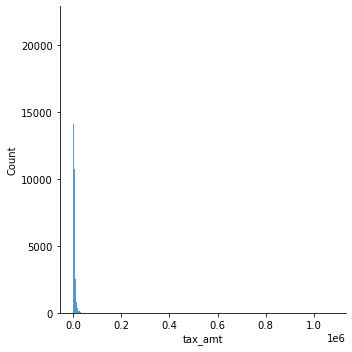

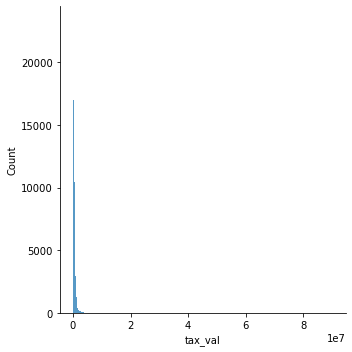

In [4]:

sns.displot(x= 'tax_amt', data= prop_vals_clean)
plt.show()
sns.displot(x= 'tax_val', data= prop_vals_clean)